### importing the required libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")


### import the dataset

In [2]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [3]:
data=pd.DataFrame(data)

In [16]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### identify the shape of data

In [7]:
 data.shape

(364558, 53)

### Identify variables with null values

In [8]:
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

### Utilize missing value treatment



In [9]:
data.fillna(0)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,0,0,0,0,0.0,0,0,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,0,0,0,0,0.0,0,0,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,0,0,0,0,0.0,0,0,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,0,0,0,0,0.0,0,0,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,0,0,0,0,0.0,0,0,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,0,0,0,0,0.0,0,0,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,0,0,0,0,0.0,0,0,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,0,0,0,0,0.0,0,0,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,0,0,0,0,0.0,0,0,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


### Analyze the date column and remove the entries if it has an incorrect timeline

In [10]:
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Resolution Action Updated Date'] = pd.to_datetime(data['Resolution Action Updated Date'])

In [13]:
data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [17]:
data['Resolution_Time'] = (data['Closed Date'] - data['Created Date']).dt.days
data_clean=data[data['Resolution_Time'].notnull()]
data_perfect = data_clean[data_clean['Closed Date'] >= data_clean['Created Date']]
data_perfect['Day of Week'] = data_perfect['Created Date'].dt.dayofweek
data_perfect['Day of Month'] = data_perfect['Created Date'].dt.day
data_perfect['Month'] = data_perfect['Created Date'].dt.month
data_perfect['Year'] = data_perfect['Created Date'].dt.year
data_perfect=data_perfect[data_perfect.Borough!='Unspecified']
data_perfect

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.0,3,31,12,2015
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0.0,3,31,12,2015
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0.0,3,31,12,2015
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0.0,3,31,12,2015
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0.0,3,31,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0.0,3,1,1,2015
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0.0,3,1,1,2015
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",0.0,3,1,1,2015
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",0.0,3,1,1,2015


### Draw a frequency plot for city-wise complaints

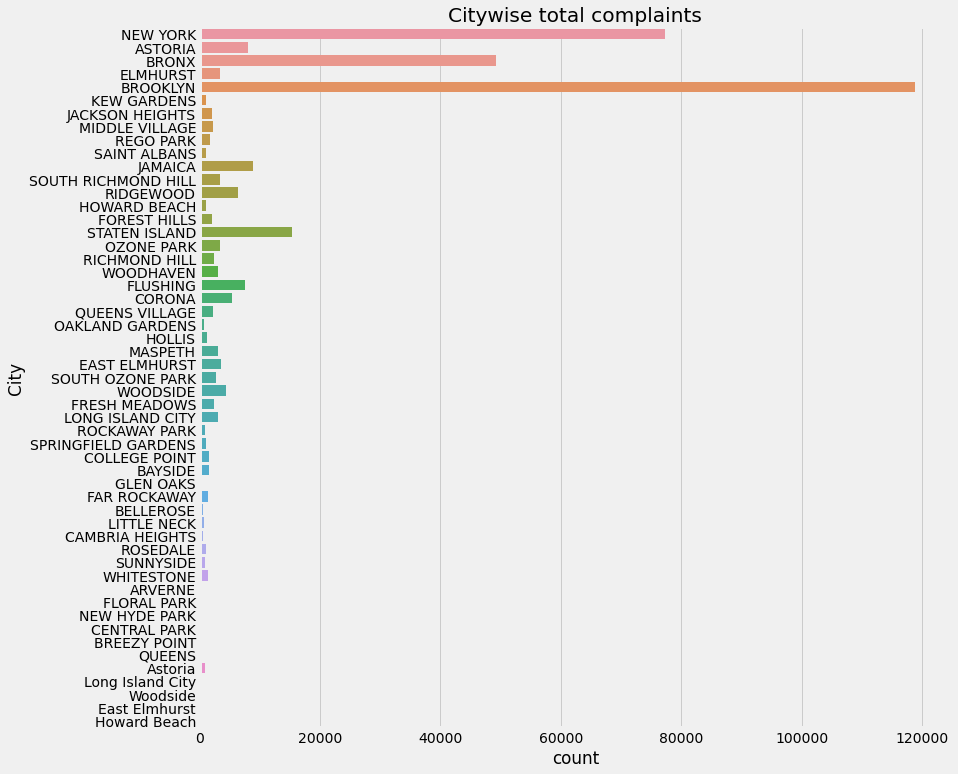

In [23]:
plt.figure(figsize=(12,12))
plt.title('Citywise total complaints')
sns.countplot(y='City',data=data)
plt.show()

### Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [24]:

df_brooklyn = data[data['Borough']=='BROOKLYN']

In [25]:
df_brooklyn.shape

(118864, 54)

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

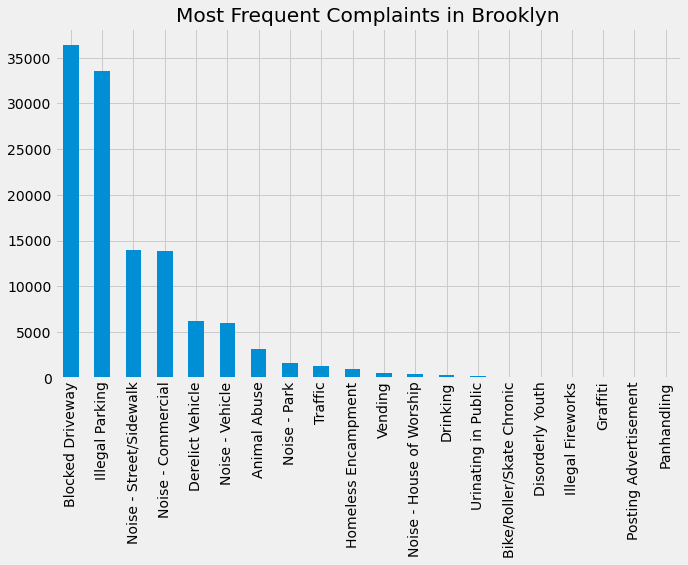

In [26]:
(df_brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

(-74.05061403028367, -73.84647934348564, 40.563150823850876, 40.74729501421672)

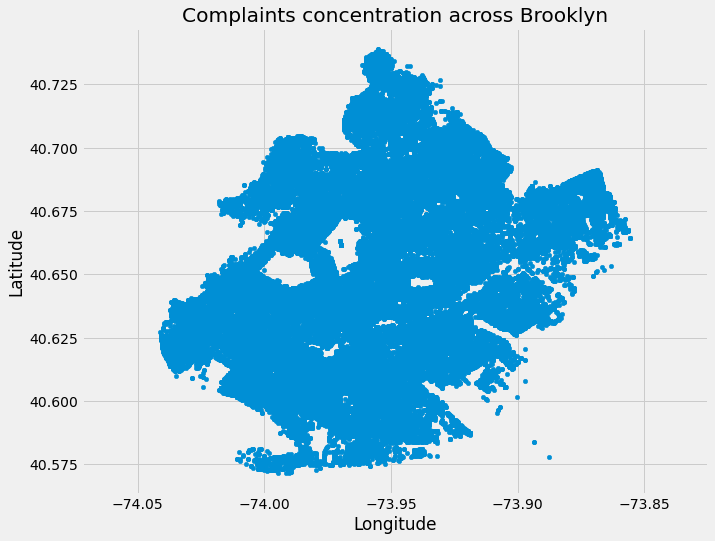

In [27]:
df_brooklyn[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.563150823850876, 40.74729501421672)

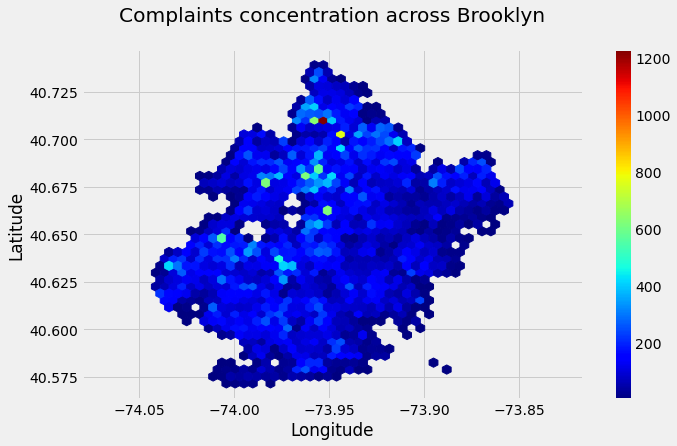

In [28]:
df_brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

### Plot a bar graph of count vs. complaint types

<AxesSubplot:title={'center':'Most Frequent Complaints'}>

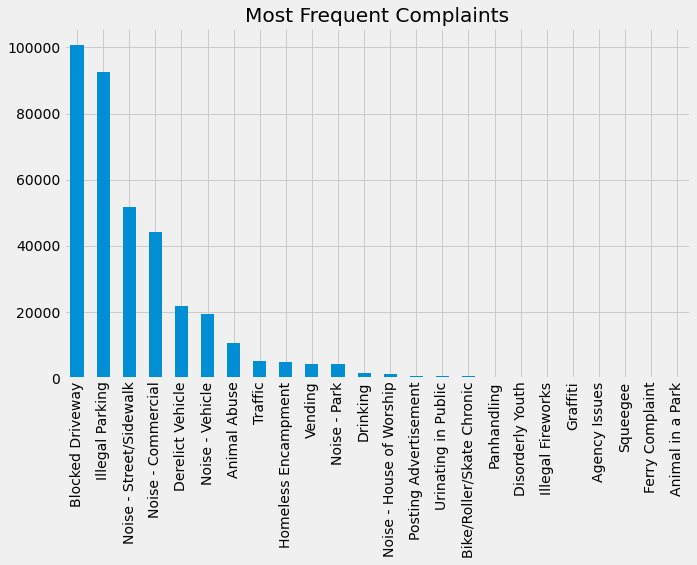

In [30]:
(data['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints')

### Find the top 10 types of complaints

In [31]:
data_complaint = data['Complaint Type'].value_counts().head(10)
data_complaint = data_complaint.to_frame()
data_complaint = data_complaint.rename(columns={'Complaint Type':'Counts'})
data_complaint

,Counts
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879
Vending,4192


### Display the types of complaints in each city in a separate dataset

In [41]:
data_sep = data[['Complaint Type','City']]

In [42]:
data_sep

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


In [51]:
data_sep['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [73]:
top5cities = data['City'].value_counts().head(53).index.to_list()
dstop5 = data[data.City.isin(top5cities)]
#citywise complaint counts(typewise)
data1 = pd.crosstab(dstop5['City'],dstop5['Complaint Type'])

###  Visualize the major types of complaints in each city

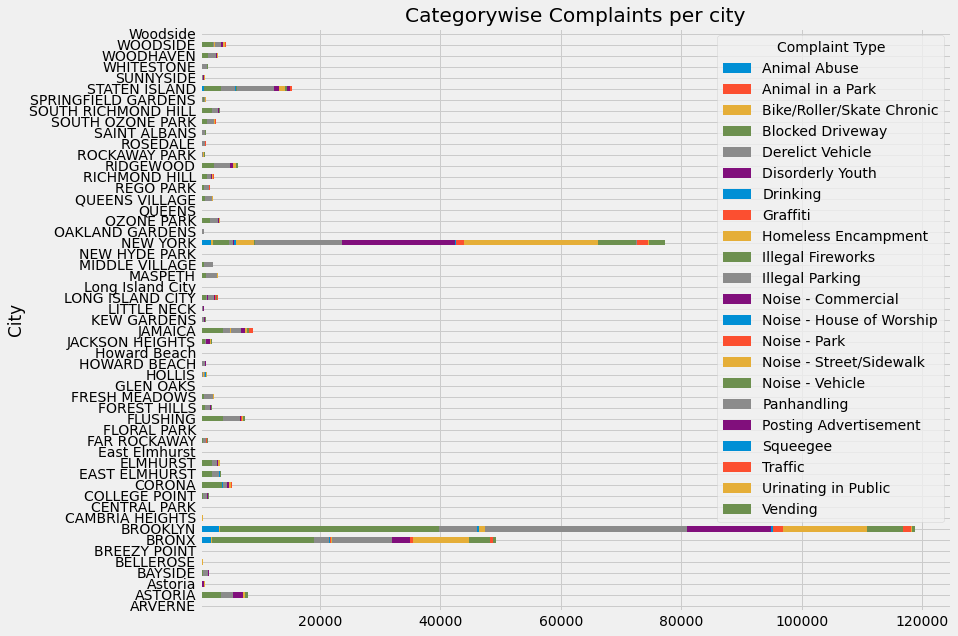

In [74]:
data1.plot(kind='barh',stacked=True,figsize=(12,10))
plt.title('Categorywise Complaints per city')
plt.show()

### Check if the average response time across various types of complaints

<AxesSubplot:title={'center':'Avg Response Time of Complaints'}, xlabel='Average Response Time', ylabel='complaint types'>

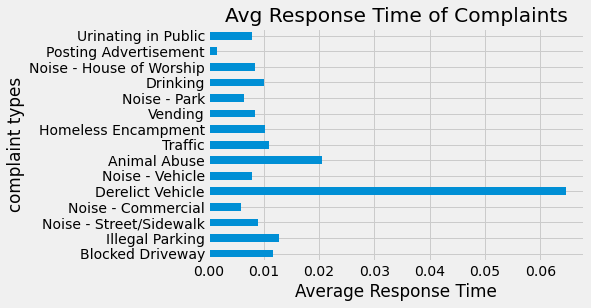

In [110]:
import matplotlib.ticker as ticker

var = data_perfect.groupby('Complaint Type').Resolution_Time.mean()
frequent = data_perfect['Complaint Type'].value_counts().head(25)
var = var.loc[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Average Response Time')
ax1.set_ylabel('complaint types')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='barh')

###  Identify significant variables by performing a statistical analysis using p-values and chi-square values

In [119]:
ctabDF = pd.crosstab(data['Complaint Type'],data['City'])

In [123]:
stat, p, dof, expected = chi2_contingency(ctabDF)
print('Chi-Square Statistic Value: ',stat)
print('p value: ',p)
print('degrees of freedom: ',dof)

Chi-Square Statistic Value:  141373.60935271924
p value:  0.0
degrees of freedom:  1092
